#Task 1: Quantization of Input Data

In [7]:
import numpy as np
from sklearn.datasets import load_iris

In [8]:
# Function to quantize data based on bit precision
def quantize_data(data, bits):
    levels = 2 ** bits
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    quantized_data = np.round(((data - min_val) / (max_val - min_val)) *
                              (levels - 1)) * (max_val - min_val) / (levels - 1) + min_val
    return quantized_data

In [9]:
# Load dataset
dataset = load_iris()
data = dataset.data
target = dataset.target

In [10]:
# Quantize data at different precision levels
data_8bit = quantize_data(data, 8)
data_4bit = quantize_data(data, 4)
data_2bit = quantize_data(data, 2)

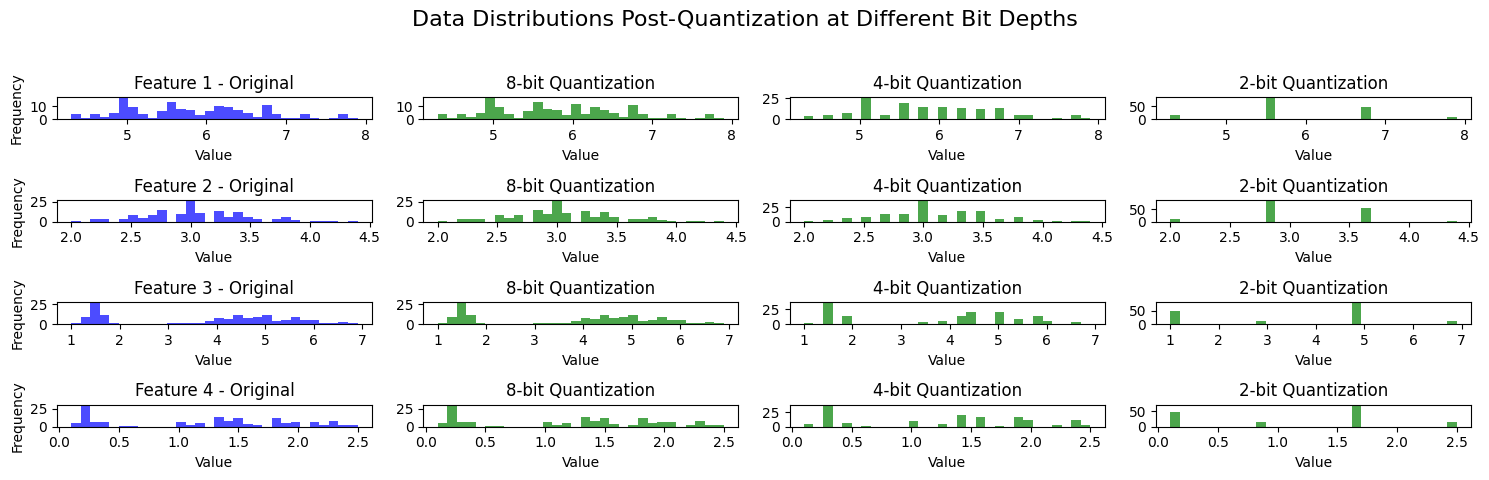

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset (you can replace this with your dataset)
data, target = load_iris(return_X_y=True)

# Quantization function
def quantize_data(data, bits):
    levels = 2 ** bits
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    quantized_data = np.round(((data - min_val) / (max_val - min_val)) *
                              (levels - 1)) * (max_val - min_val) / (levels - 1) + min_val
    return quantized_data

# Visualize quantization effects for different bit depths
def visualize_quantization_effects(data, bit_depths):
    num_features = data.shape[1]
    num_depths = len(bit_depths)

    fig, axes = plt.subplots(num_features, num_depths + 1, figsize=(15, 5))
    fig.suptitle("Data Distributions Post-Quantization at Different Bit Depths", fontsize=16)

    for i in range(num_features):
        # Original data distribution
        axes[i, 0].hist(data[:, i], bins=30, color="blue", alpha=0.7, label="Original")
        axes[i, 0].set_title(f"Feature {i + 1} - Original")
        axes[i, 0].set_xlabel("Value")
        axes[i, 0].set_ylabel("Frequency")

        # Quantized data distributions
        for j, bits in enumerate(bit_depths):
            quantized_data = quantize_data(data, bits)
            axes[i, j + 1].hist(quantized_data[:, i], bins=30, color="green", alpha=0.7, label=f"{bits}-bit")
            axes[i, j + 1].set_title(f"{bits}-bit Quantization")
            axes[i, j + 1].set_xlabel("Value")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Bit depths to visualize
bit_depths = [8, 4, 2]

# Visualize
visualize_quantization_effects(data, bit_depths)

#Task 2: Training and Evaluation with Quantized Data (Cross-Validation)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [12]:
# Function to evaluate model performance
def evaluate_model(model, data, target):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracy = cross_val_score(model, data, target, cv=cv, scoring='accuracy')
    return accuracy.mean(), accuracy.std()

In [13]:
# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'k-NN': KNeighborsClassifier(),
    'SVM': SVC()
}

In [14]:
# Evaluate each model on each quantized dataset
results = {}
for model_name, model in models.items():
    results[model_name] = {}
    # Full precision
    results[model_name]['Full'] = evaluate_model(model, data, target)
    # 8-bit precision
    results[model_name]['8-bit'] = evaluate_model(model, data_8bit, target)
    # 4-bit precision
    results[model_name]['4-bit'] = evaluate_model(model, data_4bit, target)
    # 2-bit precision
    results[model_name]['2-bit'] = evaluate_model(model, data_2bit, target)

#Task 3: Comparison with Full-Precision Models

In [2]:
# Display results
for model_name, model_results in results.items():
    print(f"\nModel: {model_name}")
    for precision, (mean_acc, std_acc) in model_results.items():
        print(f"{precision} Precision - Mean Accuracy: {mean_acc:.4f}, Std: {std_acc:.4f}")


Model: Decision Tree
Full Precision - Mean Accuracy: 0.9533, Std: 0.0340
8-bit Precision - Mean Accuracy: 0.9533, Std: 0.0340
4-bit Precision - Mean Accuracy: 0.9467, Std: 0.0542
2-bit Precision - Mean Accuracy: 0.8200, Std: 0.0957

Model: k-NN
Full Precision - Mean Accuracy: 0.9667, Std: 0.0298
8-bit Precision - Mean Accuracy: 0.9667, Std: 0.0298
4-bit Precision - Mean Accuracy: 0.9733, Std: 0.0249
2-bit Precision - Mean Accuracy: 0.7733, Std: 0.0611

Model: SVM
Full Precision - Mean Accuracy: 0.9667, Std: 0.0298
8-bit Precision - Mean Accuracy: 0.9733, Std: 0.0249
4-bit Precision - Mean Accuracy: 0.9733, Std: 0.0249
2-bit Precision - Mean Accuracy: 0.8200, Std: 0.0777


#Task 4: Impact Analysis

In [ ]:
import matplotlib.pyplot as plt

# Precision levels to use as x-axis labels
precision_levels = ["Full", "8-bit", "4-bit", "2-bit"]

# Initialize dictionaries to store mean accuracies and standard deviations
mean_accuracies = {model_name: [] for model_name in results}
std_accuracies = {model_name: [] for model_name in results}

# Populate mean_accuracies and std_accuracies from results
for model_name, model_results in results.items():
    for precision in precision_levels:
        mean_acc, std_acc = model_results[precision]
        mean_accuracies[model_name].append(mean_acc)
        std_accuracies[model_name].append(std_acc)

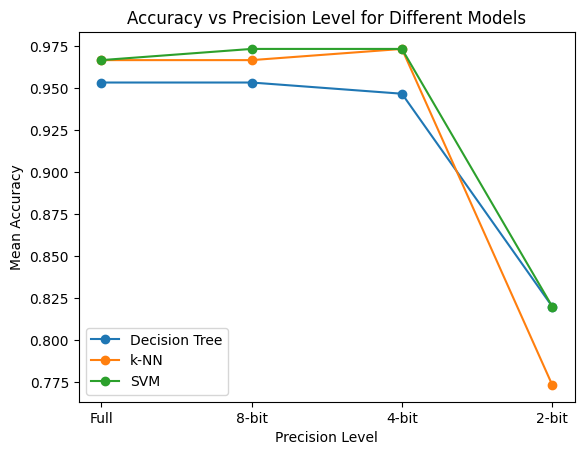

In [3]:
import matplotlib.pyplot as plt

# Plot performance metrics for each model at different precision levels
for model_name, model_results in results.items():
    precision_levels = ['Full', '8-bit', '4-bit', '2-bit']
    accuracies = [model_results[precision][0] for precision in precision_levels]

    plt.plot(precision_levels, accuracies, marker='o', label=model_name)

plt.xlabel('Precision Level')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy vs Precision Level for Different Models')
plt.legend()
plt.show()

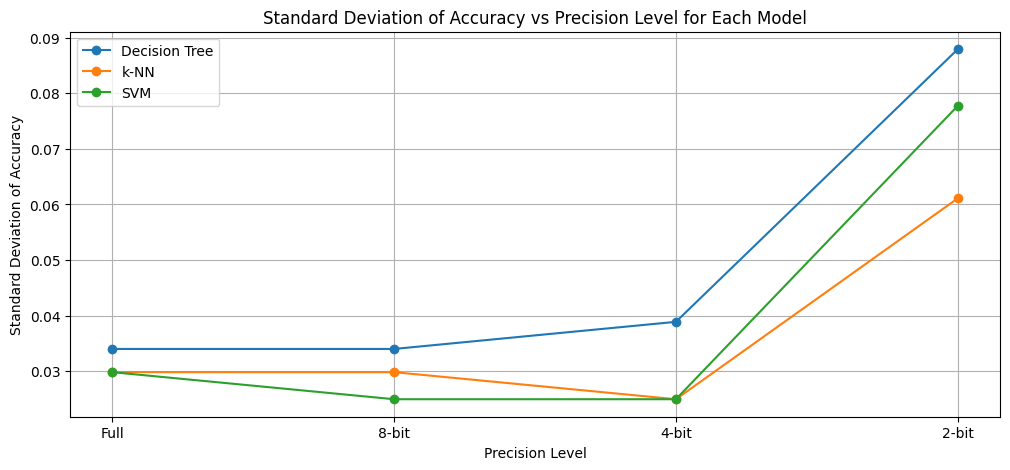

In [25]:
# Plot Standard Deviation vs Precision Level
plt.figure(figsize=(12, 5))
for model_name, std_devs in std_accuracies.items():
    plt.plot(precision_levels, std_devs, marker='o', label=model_name)
plt.title("Standard Deviation of Accuracy vs Precision Level for Each Model")
plt.xlabel("Precision Level")
plt.ylabel("Standard Deviation of Accuracy")
plt.legend()
plt.grid(True)
plt.show()


#Task 5: Logistic regression training using quantized gradient

In [15]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.datasets import load_iris

In [16]:
# Load dataset (replace with your dataset)
data, target = load_iris(return_X_y=True)

In [17]:
# Quantize gradient function
def quantize_gradient(gradient, bits):
    levels = 2 ** bits
    min_val = np.min(gradient)
    max_val = np.max(gradient)
    quantized_gradient = np.round(((gradient - min_val) / (max_val - min_val)) *
                                  (levels - 1)) * (max_val - min_val) / (levels - 1) + min_val
    return quantized_gradient

In [ ]:
# Custom SGDClassifier with quantized gradients in fit method
class QuantizedSGDClassifier(SGDClassifier):
    def fit(self, X, y, **fit_params):
        # Regular fit to initialize
        super().fit(X, y, **fit_params)
        for i in range(len(self.coef_)):
            # Using 8-bit quantization here
            quantized_gradient = quantize_gradient(self.coef_[i], 8)
            self.coef_[i] = quantized_gradient
        return self

# Evaluation function
def evaluate_model(model, X, y):
    skf = StratifiedKFold(n_splits=5)
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    return scores.mean(), scores.std()

# Quantize data function (for Task 1)
def quantize_data(data, bits):
    levels = 2 ** bits
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    quantized_data = np.round(((data - min_val) / (max_val - min_val)) *
                              (levels - 1)) * (max_val - min_val) / (levels - 1) + min_val
    return quantized_data

In [6]:
# Quantize data for 8-bit precision
data_8bit = quantize_data(data, 8)

# Evaluate full-precision logistic regression model
logistic_model_full = make_pipeline(StandardScaler(), SGDClassifier(loss='log_loss', max_iter=1000))
logistic_full_acc, logistic_full_std = evaluate_model(logistic_model_full, data, target)
print(f"Full-precision Logistic Regression - Mean Accuracy: {logistic_full_acc:.4f}, Std: {logistic_full_std:.4f}")

# Evaluate quantized gradient logistic regression model
logistic_model_quantized = make_pipeline(StandardScaler(), QuantizedSGDClassifier(loss='log_loss', max_iter=1000))
logistic_quantized_acc, logistic_quantized_std = evaluate_model(logistic_model_quantized, data_8bit, target)
print(f"Quantized Gradient Logistic Regression - Mean Accuracy: {logistic_quantized_acc:.4f}, Std: {logistic_quantized_std:.4f}")


Full-precision Logistic Regression - Mean Accuracy: 0.9400, Std: 0.0442
Quantized Gradient Logistic Regression - Mean Accuracy: 0.9533, Std: 0.0163
